# WeatherPy
----

#### Note
* Instructions have been included for each segment. You do not have to follow them exactly, but they are included to help you think through the steps.

In [17]:
# Dependencies and Setup
import matplotlib.pyplot as plt
import pandas as pd
import numpy as np
import requests
import time
from scipy.stats import linregress

# Import API key
from api_keys import weather_api_key

# Incorporated citipy to determine city based on latitude and longitude
from citipy import citipy

# Output File (CSV)
output_data_file = "output_data/cities.csv"

# Range of latitudes and longitudes
lat_range = (-90, 90)
lng_range = (-180, 180)

## Generate Cities List

In [18]:
# List for holding lat_lngs and cities
lat_lngs = []
cities = []

lat_low = -30
lat_high = 30
lon_low = 15
lon_high = 30

# Create a set of random lat and lng combinations
lats = np.random.uniform(low=lat_low, high=lat_high, size=1500)
lngs = np.random.uniform(low=lon_low, high=lon_high, size=1500)
lat_lngs = zip(lats, lngs)

# Identify nearest city for each lat, lng combination
for lat_lng in lat_lngs:
    city = citipy.nearest_city(lat_lng[0], lat_lng[1]).city_name
    
    # If the city is unique, then add it to a our cities list
    if city not in cities:
        cities.append(city)

# Print the city count to confirm sufficient count
print(len(cities))

355


### Perform API Calls
* Perform a weather check on each city using a series of successive API calls.
* Include a print log of each city as it'sbeing processed (with the city number and city name).


In [19]:
# Save config information.
url = "http://api.openweathermap.org/data/2.5/weather?"
units = "metric"

# Build partial query URL
query_url = f"{url}appid={weather_api_key}&units={units}&q="

In [20]:
city_used = []
print(f"The length of the randomly generated cities list is: {len(cities)}")
for city in cities:
    response = requests.get(query_url + city).json()
    if response['cod'] != '404':
        city_used.append(city)
print(f"The length of the vetted cities list is: {len(city_used)}")
    

The length of the randomly generated cities list is: 355
The length of the vetted cities list is: 316


In [21]:
#Read the json for one city

city = city_used[1]
query_url = url + "appid=" + weather_api_key + "&q=" + city
weather_json = requests.get(query_url).json()
print(query_url)
print(weather_json)
clouds = weather_json['clouds']['all']
ctry = weather_json['sys']['country']
humid = weather_json['main']['humidity']
lat = weather_json['coord']['lat']
lng = weather_json['coord']['lon']
maxT = weather_json['main']['temp_max']
windV = weather_json['wind']['speed']

row = [city, clouds, ctry, humid, lat, lng, maxT, windV]
print(row)


http://api.openweathermap.org/data/2.5/weather?appid=930146841c1d8290198e0f95db765f03&q=springbok
{'coord': {'lon': 17.88, 'lat': -29.67}, 'weather': [{'id': 804, 'main': 'Clouds', 'description': 'overcast clouds', 'icon': '04n'}], 'base': 'stations', 'main': {'temp': 287.15, 'feels_like': 285.53, 'temp_min': 287.15, 'temp_max': 287.15, 'pressure': 1012, 'humidity': 93}, 'wind': {'speed': 3.6, 'deg': 260}, 'clouds': {'all': 95}, 'dt': 1578455253, 'sys': {'type': 1, 'id': 1978, 'country': 'ZA', 'sunrise': 1578455779, 'sunset': 1578505982}, 'timezone': 7200, 'id': 3361142, 'name': 'Springbok', 'cod': 200}
['springbok', 95, 'ZA', 93, -29.67, 17.88, 287.15, 3.6]


In [22]:
query_url = f"{url}appid={weather_api_key}&units={units}&q="

# set up lists to hold reponse info
clouds_list = []
ctry_list = []
humid_list = []
lat_list = []
lng_list = []
maxT_list = []
windV_list = []

# Go through each city with API data and collect relevant info
for cit in city_used:
    response2 = requests.get(query_url + cit).json()
    clouds_list.append(response2['clouds']['all'])
    ctry_list.append(response2['sys']['country'])
    humid_list.append(response2['main']['humidity'])
    lat_list.append(response2['coord']['lat'])
    lng_list.append(response2['coord']['lon'])
    maxT_list.append(response2['main']['temp_max'])
    windV_list.append(response2['wind']['speed'])


In [23]:
# create a data frame from cities, lat, and temp
weather_dict = {
    "city": city_used,
    "country": ctry_list,
    "latitude": lat_list,
    "longitude": lng_list,
    "max_temp": maxT_list,
    "humidity": humid_list,
    "cloudiness": clouds_list,
    "Wind speed": windV_list
}
weather_data = pd.DataFrame(weather_dict)
weather_data

,city,country,latitude,longitude,max_temp,humidity,cloudiness,Wind speed
0,camacupa,AO,-12.02,17.48,16.77,95,100,1.40
1,springbok,ZA,-29.67,17.88,14.00,93,100,3.60
2,mporokoso,ZM,-9.37,30.12,16.41,95,87,1.17
3,oum hadjer,TD,13.30,19.70,19.29,20,1,4.86
4,lichtenburg,ZA,-26.15,26.16,19.20,61,100,5.56
...,...,...,...,...,...,...,...,...
311,luangwa,MZ,-15.62,30.40,21.81,92,100,0.15
312,caala,AO,-12.85,15.56,16.44,95,100,0.91
313,maamba,ZM,-17.36,27.22,21.92,82,100,0.50
314,yagoua,CM,10.34,15.23,18.67,20,0,3.69


### Convert Raw Data to DataFrame
* Export the city data into a .csv.
* Display the DataFrame

In [24]:
# Export file as a CSV, without the Pandas index, but with the header
weather_data.to_csv(output_data_file, index=False, header=True)

### Plotting the Data
* Use proper labeling of the plots using plot titles (including date of analysis) and axes labels.
* Save the plotted figures as .pngs.

#### Latitude vs. Temperature Plot

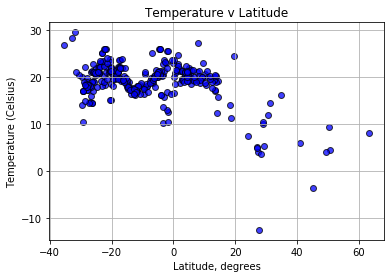

In [25]:
TempVsLat = plt.scatter(lat_list, maxT_list, marker="o", facecolors="blue", edgecolors="black", alpha=0.75)

plt.title("Temperature v Latitude")
plt.ylabel("Temperature (Celsius)")
plt.xlabel("Latitude, degrees")
plt.grid()
TempVsLat


#### Latitude vs. Humidity Plot

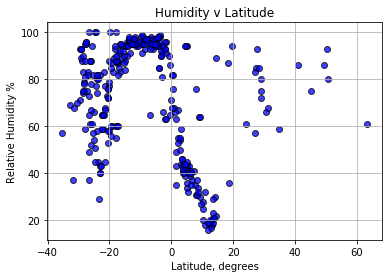

In [26]:
plt.scatter(lat_list, humid_list, marker="o", facecolors="blue", edgecolors="black", alpha=0.75)

plt.title("Humidity v Latitude")
plt.ylabel("Relative Humidity %")
plt.xlabel("Latitude, degrees")
plt.grid()

#### Latitude vs. Cloudiness Plot

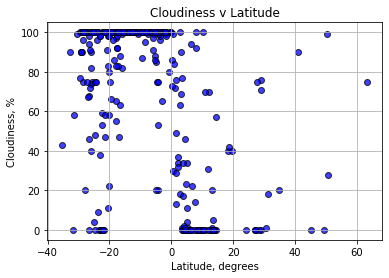

In [27]:
plt.scatter(lat_list, clouds_list, marker="o", facecolors="blue", edgecolors="black", alpha=0.75)

plt.title("Cloudiness v Latitude")
plt.ylabel("Cloudiness, %")
plt.xlabel("Latitude, degrees")
plt.grid()

#### Latitude vs. Wind Speed Plot

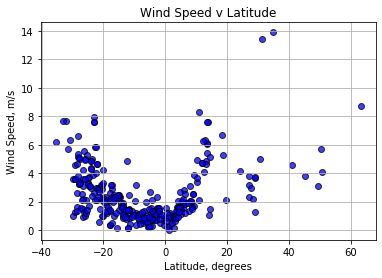

In [28]:
plt.scatter(lat_list, windV_list, marker="o", facecolors="blue", edgecolors="black", alpha=0.75)

plt.title("Wind Speed v Latitude")
plt.ylabel("Wind Speed, m/s")
plt.xlabel("Latitude, degrees")
plt.grid()

## Linear Regression

In [108]:
# OPTIONAL: Create a function to create Linear Regression plots


In [29]:
# Create Northern and Southern Hemisphere DataFrames
weather_north_df = weather_data.loc[(weather_data["latitude"] >= 0), :] 

lat_n = []
lon_n = []
temp_n = []
humid_n = []
cloud_n = []
wind_n = []

# iterate over rows with iterrows()
for index, row in weather_north_df.iterrows():
    lat_n.append(row[2])
    lon_n.append(row[3])
    temp_n.append(row[4])
    humid_n.append(row[5])
    cloud_n.append(row[6])
    wind_n.append(row[7])

weather_north_df    

,city,country,latitude,longitude,max_temp,humidity,cloudiness,Wind speed
3,oum hadjer,TD,13.30,19.70,19.29,20,1,4.86
8,marawi,PH,8.00,124.29,27.22,76,92,3.13
10,bara,NG,10.41,10.60,18.28,25,100,3.37
14,birao,CF,10.30,22.78,20.61,28,0,4.95
15,marzuq,YE,14.40,46.47,15.64,89,57,1.48
...,...,...,...,...,...,...,...,...
302,bitkine,TD,11.98,18.21,20.08,19,0,4.69
303,mobaye,CF,4.33,21.18,21.17,44,46,1.56
308,bol,TD,13.47,14.72,20.40,29,0,7.61
310,bangui,CF,4.39,18.55,21.00,94,0,1.29


In [30]:
weather_south_df = weather_data.loc[(weather_data["latitude"] < 0), :] 
weather_south_df

lat_s = []
lon_s = []
temp_s = []
humid_s = []
cloud_s = []
wind_s = []

# iterate over rows with iterrows()
for index, row in weather_south_df.iterrows():
    lat_s.append(row[2])
    lon_s.append(row[3])
    temp_s.append(row[4])
    humid_s.append(row[5])
    cloud_s.append(row[6])
    wind_s.append(row[7])

weather_south_df    

,city,country,latitude,longitude,max_temp,humidity,cloudiness,Wind speed
0,camacupa,AO,-12.02,17.48,16.77,95,100,1.40
1,springbok,ZA,-29.67,17.88,14.00,93,100,3.60
2,mporokoso,ZM,-9.37,30.12,16.41,95,87,1.17
4,lichtenburg,ZA,-26.15,26.16,19.20,61,100,5.56
5,mongo,CD,-5.62,14.60,21.45,94,99,0.21
...,...,...,...,...,...,...,...,...
309,monze,ZM,-16.28,27.48,19.24,95,100,2.33
311,luangwa,MZ,-15.62,30.40,21.81,92,100,0.15
312,caala,AO,-12.85,15.56,16.44,95,100,0.91
313,maamba,ZM,-17.36,27.22,21.92,82,100,0.50


####  Northern Hemisphere - Max Temp vs. Latitude Linear Regression

The slope of the regression line is y = -0.386900672953743x + 22.19836666860919.
The R^2 value of this regression line is 0.6085179966128911


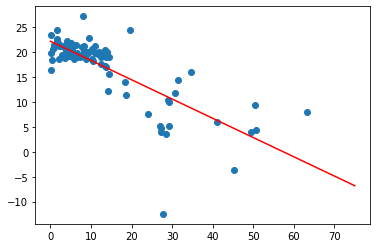

In [31]:
(slope, intercept, r, _, _) = linregress(lat_n, temp_n)

plt.plot(lat_n, temp_n, 'o', label='data')

x_axis = np.arange(0,90,15)
fit = intercept + slope*x_axis
plt.plot(x_axis, fit, 'r', label='fitted line')

print(f"The slope of the regression line is y = {slope}x + {intercept}.")
print(f"The R^2 value of this regression line is {r**2}")

####  Southern Hemisphere - Max Temp vs. Latitude Linear Regression

The slope of the regression line is y = -0.028963204003217852x + 19.15828847641211.
The R^2 value of this regression line is 0.006911191389738356


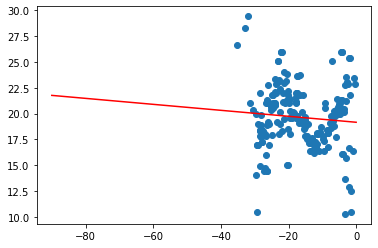

In [32]:
(slope, intercept, r, _, _) = linregress(lat_s, temp_s)

plt.plot(lat_s, temp_s, 'o', label='data')

x_axis = np.arange(-90,15,15)
fit = intercept + slope*x_axis
plt.plot(x_axis, fit, 'r', label='fitted line')

print(f"The slope of the regression line is y = {slope}x + {intercept}.")
print(f"The R^2 value of this regression line is {r**2}")

####  Northern Hemisphere - Humidity (%) vs. Latitude Linear Regression

The slope of the regression line is y = 0.6410664080646962x + 42.45129638874812.
The R^2 value of this regression line is 0.129229119059489


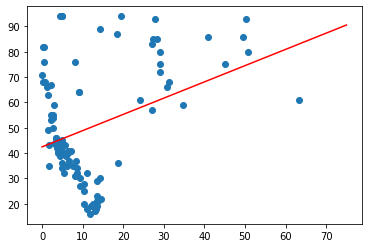

In [33]:
(slope, intercept, r, _, _) = linregress(lat_n, humid_n)

plt.plot(lat_n, humid_n, 'o', label='data')

x_axis = np.arange(0,90,15)
fit = intercept + slope*x_axis
plt.plot(x_axis, fit, 'r', label='fitted line')

print(f"The slope of the regression line is y = {slope}x + {intercept}.")
print(f"The R^2 value of this regression line is {r**2}")
#plt.legend()
#plt.show()

####  Southern Hemisphere - Humidity (%) vs. Latitude Linear Regression

The slope of the regression line is y = 0.8953426871364814x + 97.48487829612775.
The R^2 value of this regression line is 0.23307617858796614


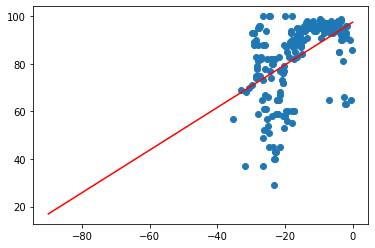

In [34]:
(slope, intercept, r, _, _) = linregress(lat_s, humid_s)

plt.plot(lat_s, humid_s, 'o', label='data')

x_axis = np.arange(-90,15,15)
fit = intercept + slope*x_axis
plt.plot(x_axis, fit, 'r', label='fitted line')

print(f"The slope of the regression line is y = {slope}x + {intercept}.")
print(f"The R^2 value of this regression line is {r**2}")
#plt.legend()
#plt.show()

####  Northern Hemisphere - Cloudiness (%) vs. Latitude Linear Regression

The slope of the regression line is y = 0.02673137212315817x + 27.23313947422687.
The R^2 value of this regression line is 9.706728537019007e-05


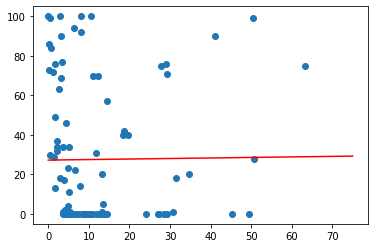

In [35]:
(slope, intercept, r, _, _) = linregress(lat_n, cloud_n)

plt.plot(lat_n, cloud_n, 'o', label='data')

x_axis = np.arange(0,90,15)
fit = intercept + slope*x_axis
plt.plot(x_axis, fit, 'r', label='fitted line')

print(f"The slope of the regression line is y = {slope}x + {intercept}.")
print(f"The R^2 value of this regression line is {r**2}")
#plt.legend()
#plt.show()

####  Southern Hemisphere - Cloudiness (%) vs. Latitude Linear Regression

The slope of the regression line is y = 0.8769391392816228x + 100.43955287427636.
The R^2 value of this regression line is 0.08363825142792368


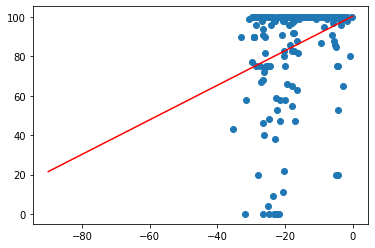

In [36]:
(slope, intercept, r, _, _) = linregress(lat_s, cloud_s)

plt.plot(lat_s, cloud_s, 'o', label='data')

x_axis = np.arange(-90,15,15)
fit = intercept + slope*x_axis
plt.plot(x_axis, fit, 'r', label='fitted line')

print(f"The slope of the regression line is y = {slope}x + {intercept}.")
print(f"The R^2 value of this regression line is {r**2}")
#plt.legend()
#plt.show()

####  Northern Hemisphere - Wind Speed (mph) vs. Latitude Linear Regression

The slope of the regression line is y = 0.11154830436156953x + 1.5231319535884726.
The R^2 value of this regression line is 0.3277368071154411


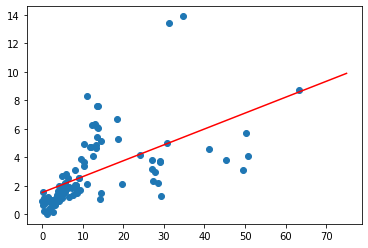

In [37]:
(slope, intercept, r, _, _) = linregress(lat_n, wind_n)

plt.plot(lat_n, wind_n, 'o', label='data')

x_axis = np.arange(0,90,15)
fit = intercept + slope*x_axis
plt.plot(x_axis, fit, 'r', label='fitted line')

print(f"The slope of the regression line is y = {slope}x + {intercept}.")
print(f"The R^2 value of this regression line is {r**2}")
#plt.legend()
#plt.show()

####  Southern Hemisphere - Wind Speed (mph) vs. Latitude Linear Regression

The slope of the regression line is y = -0.12345475859263261x + 0.22784855162016404.
The R^2 value of this regression line is 0.424117333162999


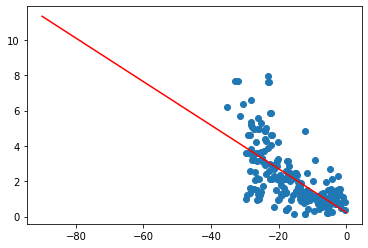

In [38]:
(slope, intercept, r, _, _) = linregress(lat_s, wind_s)

plt.plot(lat_s, wind_s, 'o', label='data')

x_axis = np.arange(-90,15,15)
fit = intercept + slope*x_axis
plt.plot(x_axis, fit, 'r', label='fitted line')

print(f"The slope of the regression line is y = {slope}x + {intercept}.")
print(f"The R^2 value of this regression line is {r**2}")
#plt.legend()
#plt.show()